# **House Price Prediction using Linear Regression Algorithm**

# Import Libraries and modules

In [1]:
# for data manipulation
import pandas as pd 
import numpy as np

# for data visualization 
import seaborn as sns
import matplotlib.pyplot as plt

# for filter warnings
import warnings
warnings.filterwarnings('ignore')

# Sciket Learn for model building 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

# Pickle for saving 
import pickle

# Loading Dataset

In [2]:
# As we have two separate CSV files for training and testing 

train_data = pd.read_csv("HousePriceDataset_train.csv")
test_data = pd.read_csv("HousePriceDataset_test.csv")

In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Basic EDA

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# checking for null values 
train_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
# All columns name check 
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Extracting the useful features from train_data and test_data

In [8]:
# Features such as Area, no. of bedrooms, no. of bathrooms and saleprice of house is required for analysis.

training = train_data.loc[:,['LotArea','BedroomAbvGr','FullBath','SalePrice']]
testing = test_data.loc[:,['LotArea','BedroomAbvGr','FullBath']]
print("training ...........")
print(training.isnull().sum())
print("\ntesting...............")
print(testing.isnull().sum())

training ...........
LotArea         0
BedroomAbvGr    0
FullBath        0
SalePrice       0
dtype: int64

testing...............
LotArea         0
BedroomAbvGr    0
FullBath        0
dtype: int64


In [9]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotArea       1460 non-null   int64
 1   BedroomAbvGr  1460 non-null   int64
 2   FullBath      1460 non-null   int64
 3   SalePrice     1460 non-null   int64
dtypes: int64(4)
memory usage: 45.8 KB


# Visualizing the data

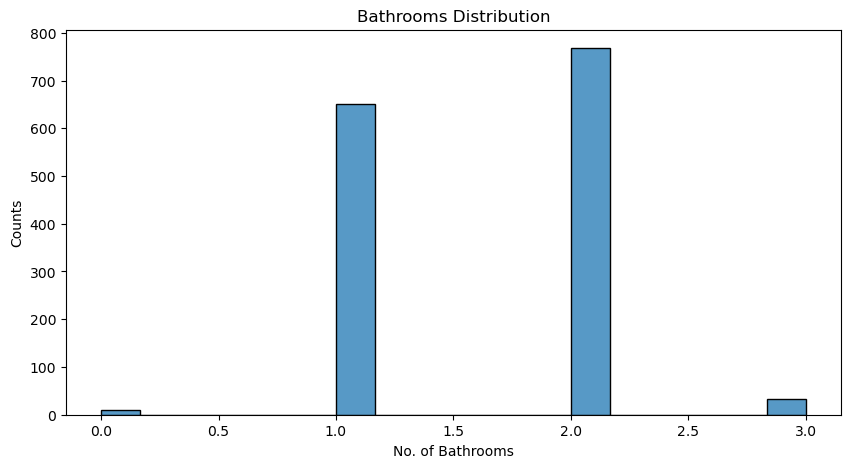

In [10]:
# distribution of bathrooms
plt.figure(figsize=(10,5))
sns.histplot(training['FullBath'])
plt.xlabel("No. of Bathrooms")
plt.ylabel("Counts")
plt.title("Bathrooms Distribution")
plt.show()

**most of the houses are having 1 or 2 bathrooms**

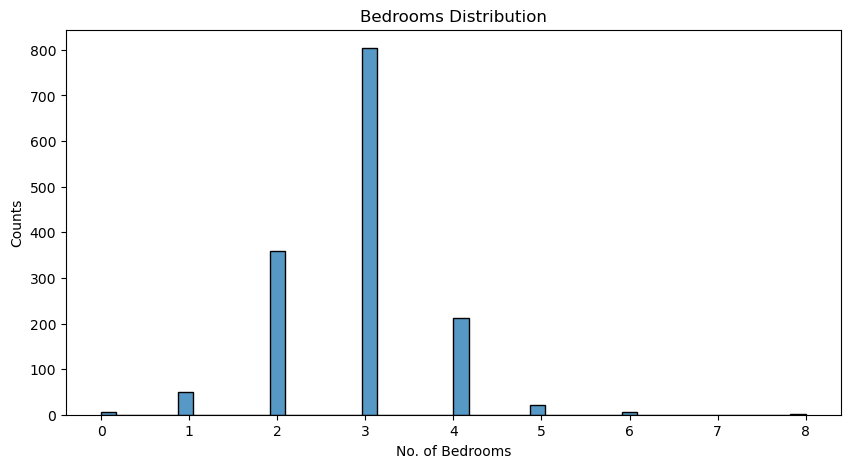

In [11]:
# distribution of bedrooms
plt.figure(figsize=(10,5))
sns.histplot(training['BedroomAbvGr'])
plt.xlabel("No. of Bedrooms")
plt.ylabel("Counts")
plt.title("Bedrooms Distribution")
plt.show()

**majority of the houses having 3 bedrooms**

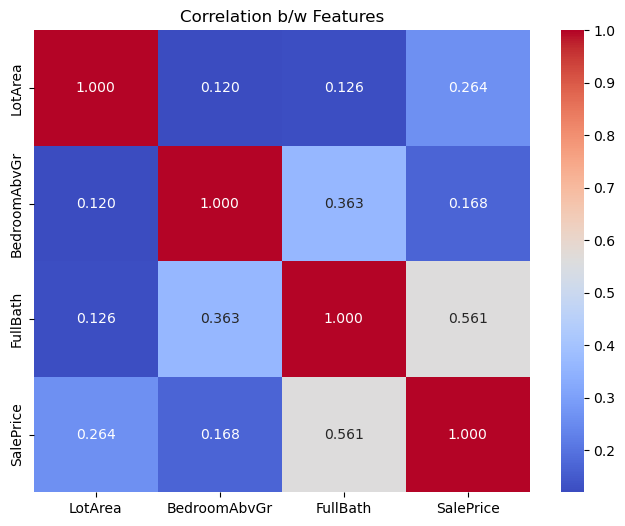

In [12]:
# Visualization the correlation b/w the features 
plt.figure(figsize=(8,6))
sns.heatmap(training.corr(), cmap='coolwarm', annot=True, fmt='.3f')
plt.title("Correlation b/w Features")
plt.show()

**no. of bathrooms have 50% correlation with Saleprice of the house**

# Splitting into Features and Target 

In [13]:
x = training.drop('SalePrice',axis=1)
y = training['SalePrice']

print(f"shape of x : {x.shape}")
print(f"shape of y : {y.shape}")

shape of x : (1460, 3)
shape of y : (1460,)


# Splitting into Training and Testing Dataset

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)


print(f"shape of x_train : {x_train.shape}")
print(f"shape of y_train : {y_train.shape}")
print(f"shape of x_test : {x_test.shape}")
print(f"shape of y_test : {y_test.shape}")

shape of x_train : (1314, 3)
shape of y_train : (1314,)
shape of x_test : (146, 3)
shape of y_test : (146,)


# Model Building

In [15]:
# Building an initial model
LR = LinearRegression()
model = LR.fit(x_train,y_train)

# predicted price 
y_pred = model.predict(x_test)

# Model evaluation

In [16]:
r2_scores = r2_score(y_test,y_pred)
print(f"R2_Score of Model : {r2_scores:.4f}\n")

mean_absolute_errors = mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error : { mean_absolute_errors:.4f}\n")

root_mean_squared_errors = root_mean_squared_error(y_test,y_pred)
print(f"RMSE : {root_mean_squared_errors:.4f}")

R2_Score of Model : 0.3491

Mean Absolute Error : 46780.1348

RMSE : 77115.7520


# Hyperparamter tuning

In [17]:
from sklearn.model_selection import GridSearchCV

model_1 = LinearRegression()
params = {
    'fit_intercept' : [True,False],
    'copy_X' : [True,False],
    'n_jobs' : [5,10,15,20,None],
    'positive' : [True,False]
}

grid_search = GridSearchCV(estimator=model_1, param_grid=params, cv=5)
grid_search.fit(x_train,y_train)
print("Best Parameters........")
print(grid_search.best_params_)

# best_model 
best_model = grid_search.best_estimator_
print("\nbest estimator is saved in instance of best_model")

# predicting the prices using best model 
pred = best_model.predict(x_test)

# Best model Evaluation 
print("\n\nbest_model Evaluation ....................\n")
r2_scores = r2_score(y_test,pred)
print(f"R2_Score of best_model : {r2_scores}\n")

mean_absolute_errors = mean_absolute_error(y_test,pred)
print(f"Mean Absolute Error of best_model : { mean_absolute_errors}\n")

root_mean_squared_errors = root_mean_squared_error(y_test,pred)
print(f"RMSE of best_model: {root_mean_squared_errors}")

Best Parameters........
{'copy_X': True, 'fit_intercept': True, 'n_jobs': 5, 'positive': False}

best estimator is saved in instance of best_model


best_model Evaluation ....................

R2_Score of best_model : 0.3491218508073858

Mean Absolute Error of best_model : 46780.13483172896

RMSE of best_model: 77115.7519905703


# ***Insight - as there is no significant change noticed while evaluation of best_model therefore its better to go with default ones.***

# Saving the model

In [18]:
# Saving the initial model 

with open('model-task01','wb') as file:
    pickle.dump(model,file)

# Predicting the prices for testing dataset

In [19]:
# Loading model 

with open('model-task01','rb') as file:
    model_loaded = pickle.load(file)

predicted_prices = model_loaded.predict(testing)
print("Predicted Prices are .....")
print(predicted_prices)    

Predicted Prices are .....
[142880.64831638 141037.41133446 218298.51312446 ... 143931.41407922
 135168.02040369 211850.77394985]


In [20]:
# Adding feature in testing dataset
testing['Predicted_Prices'] = predicted_prices

testing

,LotArea,BedroomAbvGr,FullBath,Predicted_Prices
0,11622,2,1,142880.648316
1,14267,3,1,141037.411334
2,13830,3,2,218298.513124
3,9978,3,2,212389.236108
4,5005,2,2,210661.134332
...,...,...,...,...
1454,1936,3,1,122120.668112
1455,1894,3,1,122056.236743
1456,20000,4,1,143931.414079
1457,10441,3,1,135168.020404


# Saving the Predicted Prices

In [21]:
# Saving the predicted price in 'csv' format

testing.to_csv('Predicted_salary_sheet.csv')